In [1]:
import os
import glob # Adds wildcard-support for file exploration
import numpy as np
import matplotlib.pyplot as plt

# Load functions from file "utils.py"
import utils

### Load dataset

In [2]:
# Please set the acticity-folder to load the data from
activity_directory = "crunches"

data_path = os.path.join("..", "data", activity_directory, "raw")
gyro_data_files = glob.glob(os.path.join(data_path,"*_gyro_sensor_data_*.txt"))
accel_data_files = glob.glob(os.path.join(data_path,"*_accel_sensor_data_*.txt"))

clipped_data_destination_path = os.path.join("..", "data", activity_directory, "clipped")

print(*gyro_data_files, sep="\n")
print("\n")
print(*accel_data_files, sep="\n")

../data/crunches/raw/Crunches_gyro_sensor_data_1618245491080.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1617807292329.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1617807414485.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1617807602040.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1617807753937.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1618245357631.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1618245644631.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1618245822090.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1618853698250.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1618853769762.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1618853877300.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1618854095163.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1619504139040.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1619504196934.txt
../data/crunches/raw/Crunches_gyro_sensor_data_1619504360425.txt
../data/crunches/raw/Crun

In [3]:
file_idx = 17

T_clip_start = 3
T_clip_end = 36

save = False

gyro_data_file = gyro_data_files[file_idx]
accel_data_file = gyro_data_file.replace("gyro", "accel")
gyro_data = np.loadtxt(gyro_data_file, delimiter=";")
accel_data = np.loadtxt(accel_data_file, delimiter=";")

gyro_data[:,0] = gyro_data[:,0] * 1e-3
accel_data[:,0] = accel_data[:,0] * 1e-3

In [4]:
gyro_data_file

'../data/crunches/raw/Crunches_gyro_sensor_data_1619542089969.txt'

In [5]:
accel_data_file

'../data/crunches/raw/Crunches_accel_sensor_data_1619542089969.txt'

### Interpolate and resample
The data from the sensors is not captured at a uniform sampling rate. Using linear interpolation, a sampling-rate of $100\ \text{Hz}$ is applied.

In [6]:
t_gyro_new, gyro_data_new = utils.resample_3d_timeseries(t=gyro_data[:,0], y=gyro_data[:,1:], f_resample=100.0)
t_accel_new , accel_data_new = utils.resample_3d_timeseries(t=accel_data[:,0], y=accel_data[:,1:], f_resample=100.0)

# Crop both data arrays to the same length.
if t_gyro_new[-1] < t_accel_new[-1]:
    T_max = t_gyro_new[-1]
    idx = t_accel_new <= T_max
    t_accel_new = t_accel_new[idx]
    accel_data_new = accel_data_new[idx,:]
else:
    T_max = t_accel_new[-1]
    idx = t_gyro_new <= T_max
    t_gyro_new = t_gyro_new[idx]
    gyro_data_new = gyro_data_new[idx,:]

# Check both lengths are now really the same.
assert len(t_gyro_new) == len(t_accel_new)

### Clipping Gyro-data

In [7]:
gyro_original_clip_start, gyro_original_clip_end, t_gyro_original_clipped, signals_gyro_original_clipped = \
    utils.clip_data(gyro_data[:,0], gyro_data[:,1:], T_clip_start, T_clip_end)

gyro_resampled_clip_start, gyro_resampled_clip_end, t_gyro_resampled_clipped, signals_gyro_resampled_clipped = \
    utils.clip_data(t_gyro_new, gyro_data_new, T_clip_start, T_clip_end)

In [8]:
if save:
    data_file_basename = os.path.basename(gyro_data_file)[:-4]
    resampled_clipped_data_filename = os.path.join(clipped_data_destination_path, data_file_basename + "_resampled_clipped.npy")
    original_clipped_data_filename = os.path.join(clipped_data_destination_path, data_file_basename + "_original_clipped.npy")
    
    print(resampled_clipped_data_filename)
    print(original_clipped_data_filename)
    
    np.save(original_clipped_data_filename, np.column_stack((t_gyro_original_clipped, signals_gyro_original_clipped)), allow_pickle=True)
    np.save(resampled_clipped_data_filename, np.column_stack((t_gyro_resampled_clipped, signals_gyro_resampled_clipped)), allow_pickle=True)

### Clipping Accelerometer-data

In [9]:
accel_original_clip_start, accel_original_clip_end, t_accel_original_clipped, signals_accel_original_clipped = \
    utils.clip_data(accel_data[:,0], accel_data[:,1:], T_clip_start, T_clip_end)

accel_resampled_clip_start, accel_resampled_clip_end, t_accel_resampled_clipped, signals_accel_resampled_clipped = \
    utils.clip_data(t_accel_new, accel_data_new, T_clip_start, T_clip_end)

In [10]:
if save:
    data_file_basename = os.path.basename(accel_data_file)[:-4]
    resampled_clipped_data_filename = os.path.join(clipped_data_destination_path, data_file_basename + "_resampled_clipped.npy")
    original_clipped_data_filename = os.path.join(clipped_data_destination_path, data_file_basename + "_original_clipped.npy")
    
    print(resampled_clipped_data_filename)
    print(original_clipped_data_filename)
    
    np.save(original_clipped_data_filename, np.column_stack((t_accel_original_clipped, signals_accel_original_clipped)), allow_pickle=True)
    np.save(resampled_clipped_data_filename, np.column_stack((t_accel_resampled_clipped, signals_accel_resampled_clipped)), allow_pickle=True)

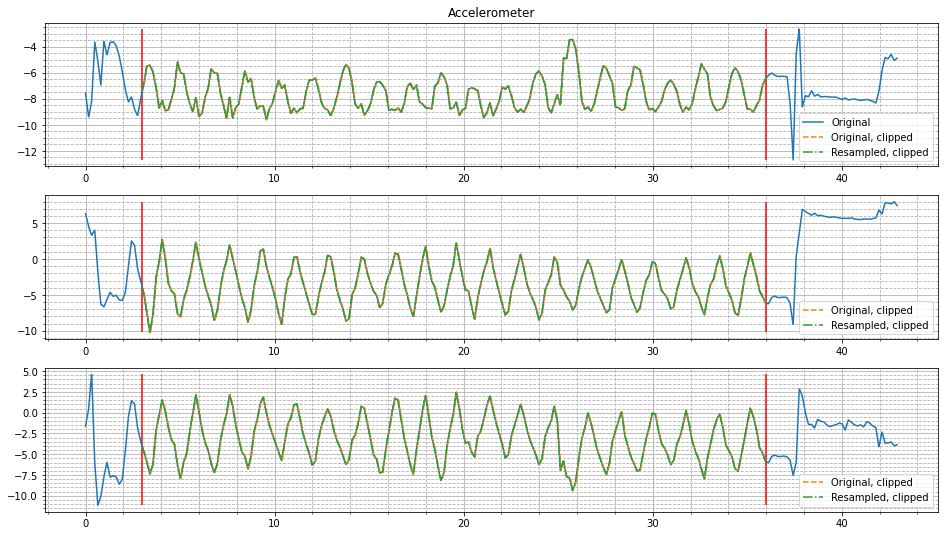

In [11]:
plt.figure(figsize=(16,9))
plt.subplot(311)
plt.plot(t_accel_new, accel_data_new[:,0], label="Original")
plt.plot(t_accel_original_clipped, signals_accel_original_clipped[:,0], label="Original, clipped", linestyle="--")
plt.plot(t_accel_resampled_clipped, signals_accel_resampled_clipped[:,0], label="Resampled, clipped", linestyle="-.")
val_min = np.min(accel_data_new[:,0])
val_max = np.max(accel_data_new[:,0])
plt.vlines(t_accel_new[accel_resampled_clip_start], val_min, val_max, color="red")
plt.vlines(t_accel_new[accel_resampled_clip_end], val_min, val_max, color="red")
plt.grid(which="major")
plt.grid(which="minor", linestyle="--")
plt.minorticks_on()
plt.legend()
plt.title("Accelerometer")

plt.subplot(312)
plt.plot(t_accel_new, accel_data_new[:,1])
plt.plot(t_accel_original_clipped, signals_accel_original_clipped[:,1], label="Original, clipped", linestyle="--")
plt.plot(t_accel_resampled_clipped, signals_accel_resampled_clipped[:,1], label="Resampled, clipped", linestyle="-.")
val_min = np.min(accel_data_new[:,1])
val_max = np.max(accel_data_new[:,1])
plt.vlines(t_accel_new[accel_resampled_clip_start], val_min, val_max, color="red")
plt.vlines(t_accel_new[accel_resampled_clip_end], val_min, val_max, color="red")
plt.grid(which="major")
plt.grid(which="minor", linestyle="--")
plt.minorticks_on()
plt.legend()

plt.subplot(313)
plt.plot(t_accel_new, accel_data_new[:,2])
plt.plot(t_accel_original_clipped, signals_accel_original_clipped[:,2], label="Original, clipped", linestyle="--")
plt.plot(t_accel_resampled_clipped, signals_accel_resampled_clipped[:,2], label="Resampled, clipped", linestyle="-.")
val_min = np.min(accel_data_new[:,2])
val_max = np.max(accel_data_new[:,2])
plt.vlines(t_accel_new[accel_resampled_clip_start], val_min, val_max, color="red")
plt.vlines(t_accel_new[accel_resampled_clip_end], val_min, val_max, color="red")
plt.grid(which="major")
plt.grid(which="minor", linestyle="--")
plt.minorticks_on()
plt.legend()

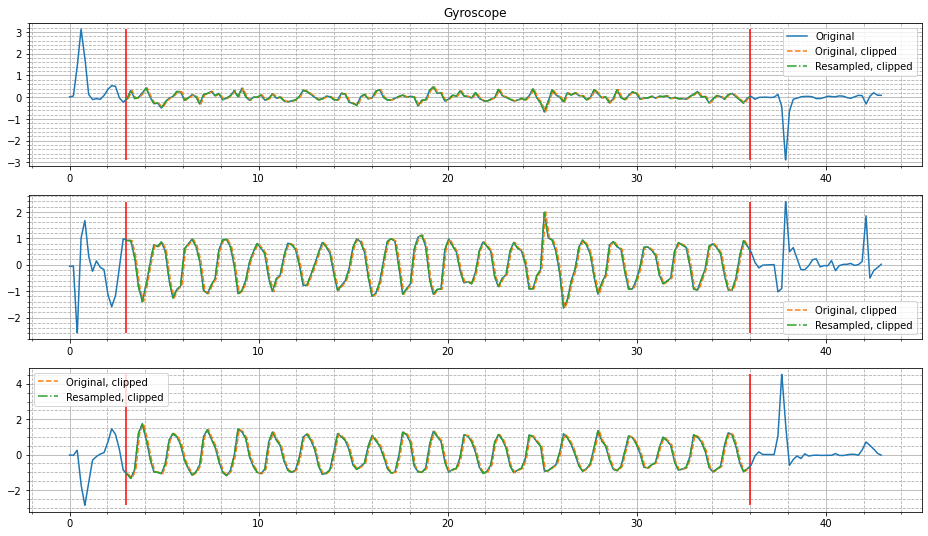

In [12]:
plt.figure(figsize=(16,9))
plt.subplot(311)
plt.plot(t_gyro_new, gyro_data_new[:,0], label="Original")
plt.plot(t_gyro_original_clipped, signals_gyro_original_clipped[:,0], label="Original, clipped", linestyle="--")
plt.plot(t_gyro_resampled_clipped, signals_gyro_resampled_clipped[:,0], label="Resampled, clipped", linestyle="-.")
val_min = np.min(gyro_data_new[:,0])
val_max = np.max(gyro_data_new[:,0])
plt.vlines(t_gyro_new[gyro_resampled_clip_start], val_min, val_max, color="red")
plt.vlines(t_gyro_new[gyro_resampled_clip_end], val_min, val_max, color="red")
plt.grid(which="major")
plt.grid(which="minor", linestyle="--")
plt.minorticks_on()
plt.legend()
plt.title("Gyroscope")

plt.subplot(312)
plt.plot(t_gyro_new, gyro_data_new[:,1])
plt.plot(t_gyro_original_clipped, signals_gyro_original_clipped[:,1], label="Original, clipped", linestyle="--")
plt.plot(t_gyro_resampled_clipped, signals_gyro_resampled_clipped[:,1], label="Resampled, clipped", linestyle="-.")
val_min = np.min(gyro_data_new[:,1])
val_max = np.max(gyro_data_new[:,1])
plt.vlines(t_gyro_new[gyro_resampled_clip_start], val_min, val_max, color="red")
plt.vlines(t_gyro_new[gyro_resampled_clip_end], val_min, val_max, color="red")
plt.grid(which="major")
plt.grid(which="minor", linestyle="--")
plt.minorticks_on()
plt.legend()

plt.subplot(313)
plt.plot(t_gyro_new, gyro_data_new[:,2])
plt.plot(t_gyro_original_clipped, signals_gyro_original_clipped[:,2], label="Original, clipped", linestyle="--")
plt.plot(t_gyro_resampled_clipped, signals_gyro_resampled_clipped[:,2], label="Resampled, clipped", linestyle="-.")
val_min = np.min(gyro_data_new[:,2])
val_max = np.max(gyro_data_new[:,2])
plt.vlines(t_gyro_new[gyro_resampled_clip_start], val_min, val_max, color="red")
plt.vlines(t_gyro_new[gyro_resampled_clip_end], val_min, val_max, color="red")
plt.grid(which="major")
plt.grid(which="minor", linestyle="--")
plt.minorticks_on()
plt.legend()